In [ ]:
%load_ext autoreload
%autoreload 2

In [24]:
import numpy as np
import pandas as pd

In [66]:
def generate_synthetic_timeseries(
    phi, means, std_devs, correlation_matrix, num_timesteps=100
):
    """
    Generates a multivariate time series using an autoregressive process (AR) and covariance matrix.

    Parameters:
    - phi: List of AR coefficients (e.g., [0.8] for AR(1), [0.6, 0.2] for AR(2)).
    - covariance_matrix: Covariance matrix (num_variables x num_variables).
    - num_timesteps: Number of time steps to generate.

    Returns:
    - Pandas DataFrame containing the time series.
    """
    assert std_devs.ndim == 1, "std_devs must be a 1D array"
    assert correlation_matrix.ndim == 2, "correlation_matrix must be a 2D array"
    assert (
        correlation_matrix.shape[0] == correlation_matrix.shape[1]
    ), "correlation_matrix must be square"
    assert (
        len(std_devs) == correlation_matrix.shape[0]
    ), "std_devs and correlation_matrix must have the same length"
    covariance_matrix = np.outer(std_devs, std_devs) * correlation_matrix
    num_variables = covariance_matrix.shape[0]  # Number of variables

    # Check that the length of phi is consistent with the AR order
    ar_order = len(phi)

    # Initialize time series with zeros
    time_series = np.zeros((num_timesteps, num_variables))

    # Generate the first `ar_order` steps using multivariate normal (initial condition)
    initial_steps = np.random.multivariate_normal(
        means, covariance_matrix, size=ar_order
    )
    time_series[:ar_order, :] = initial_steps

    # Generate AR time series from step `ar_order` onwards
    for t in range(ar_order, num_timesteps):
        print(f"{t=}")
        # Initialize current time step with zeros
        time_step_value = np.zeros(num_variables)

        # Add contributions from past `ar_order` steps
        for lag in range(1, ar_order + 1):
            time_step_value += phi[lag - 1] * time_series[t - lag, :]

        # Add noise (Gaussian multivariate noise)
        noise = np.random.multivariate_normal(means, covariance_matrix)
        time_series[t, :] = time_step_value + noise
        print(f"{time_series[t, :]=}")

    # Create a DataFrame for better representation
    columns = [f"Variable_{i+1}" for i in range(num_variables)]
    time_series_df = pd.DataFrame(time_series, columns=columns)

    return time_series_df

In [79]:
num_variables = 5
phi = [0.1]
correlation_matrix = np.eye(num_variables)  # Identity matrix
# Add some correlation between variables
correlation_matrix += np.random.normal(0, 0.4, size=(num_variables, num_variables))
# Make the correlation matrix symmetric
correlation_matrix = (correlation_matrix + correlation_matrix.T) / 2
# make the diagonal values equal to 1
np.fill_diagonal(correlation_matrix, 1)

std_devs = np.random.uniform(0.1, 0.5, num_variables)
means = np.random.uniform(-5, 5, num_variables)
time_series = generate_synthetic_timeseries(
    phi, means, std_devs, correlation_matrix, num_timesteps=100
)

t=1
time_series[t, :]=array([-4.58228175, -3.87733007,  1.48578717, -4.92821704, -3.62085653])
t=2
time_series[t, :]=array([-5.7047811 , -4.0580955 ,  1.27717673, -4.67649789, -3.64384734])
t=3
time_series[t, :]=array([-5.7902204 , -3.73071088,  1.32844241, -4.67910396, -3.27743887])
t=4
time_series[t, :]=array([-4.85924135, -4.14772036,  1.03167584, -5.1253837 , -3.3045177 ])
t=5
time_series[t, :]=array([-4.64602059, -3.87661564,  1.5890227 , -4.79019917, -3.34136244])
t=6
time_series[t, :]=array([-5.00728767, -3.7342958 ,  1.17500276, -4.75947874, -3.33650688])
t=7
time_series[t, :]=array([-5.2248379 , -4.11622424,  0.90339667, -4.51116142, -3.54022698])
t=8
time_series[t, :]=array([-5.47948502, -3.87358511,  1.00964229, -4.30630899, -3.65153608])
t=9
time_series[t, :]=array([-5.57160085, -3.54278393,  1.43226835, -4.44877137, -3.67485745])
t=10
time_series[t, :]=array([-5.49707719, -3.48893746,  1.73345288, -4.53426461, -3.57288329])
t=11
time_series[t, :]=array([-6.08674206, -3.861

In [80]:
time_series

,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5
0,-4.243818,-3.345436,1.552480,-4.618984,-3.368009
1,-4.582282,-3.877330,1.485787,-4.928217,-3.620857
2,-5.704781,-4.058096,1.277177,-4.676498,-3.643847
3,-5.790220,-3.730711,1.328442,-4.679104,-3.277439
4,-4.859241,-4.147720,1.031676,-5.125384,-3.304518
...,...,...,...,...,...
95,-5.968885,-3.803704,0.955867,-4.250518,-3.131618
96,-5.672214,-4.064766,1.363855,-4.945418,-3.277614
97,-5.380845,-3.790662,1.524978,-4.618746,-3.283746
98,-5.001500,-3.808158,1.404034,-4.587440,-3.307051


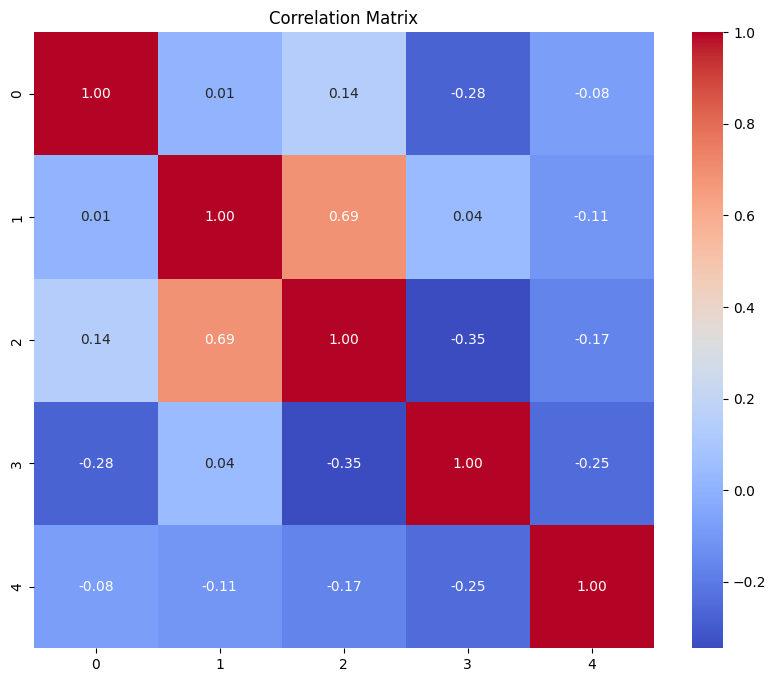

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

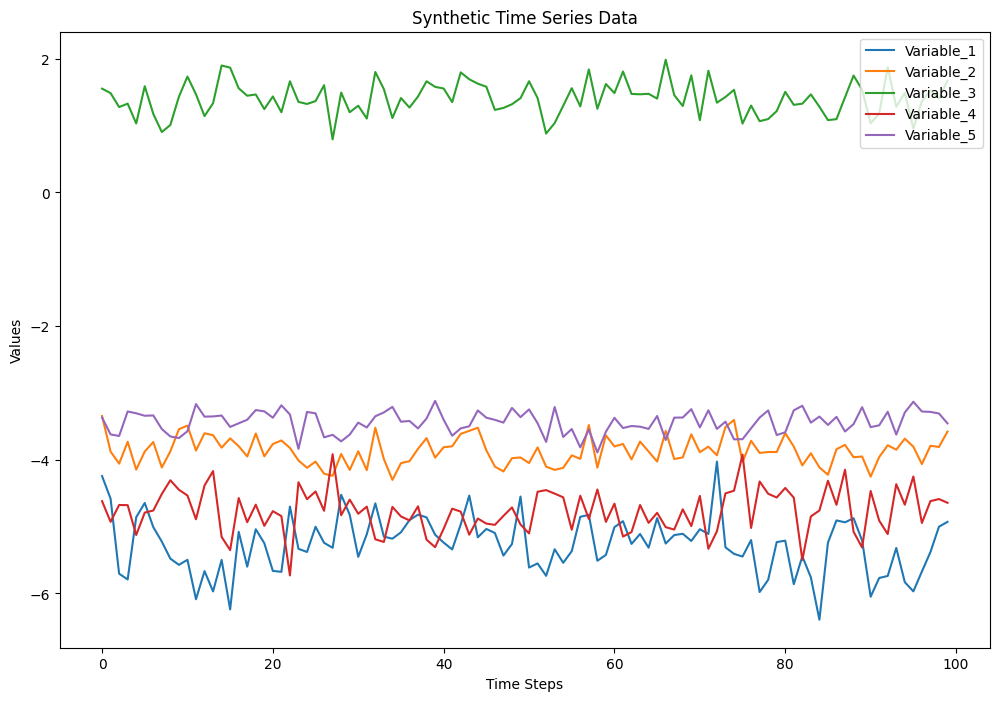

In [82]:
time_series.plot(figsize=(12, 8))
plt.title("Synthetic Time Series Data")
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.legend(loc="upper right")
plt.show()

In [34]:
means

array([-1.12027246,  3.29565831, -3.66304346,  4.3539449 ,  2.51423318])